## Raster data

Raster objects were briefly introduced earlier, where the main takeaway was that the raster type (when read with rasterio) is a numpy array and a dict metadata. Now we want to see how we can perform operations in the raster data.

In [26]:
import rasterio
import rasterio.plot
import numpy as np
import matplotlib.pyplot as plt

src = rasterio.open('data/RGB.byte.tif')
arr = src.read(1)

arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### Raster subsetting

Rasters is very easy to subset, but can be tricky for complex images. Tiff images have bands, and they can be read from rasterio with img.read(x), where x is band number x. We can also read with img.read() to read all the bands.

A common start is to check the shape of the array. It is either (layers, rows, columns) if it is multiple bands, or (rows, columns) if its only one band, f.ex from src.read(1)


1D-array shape is (718, 791)
3D-array shape is (3, 718, 791)


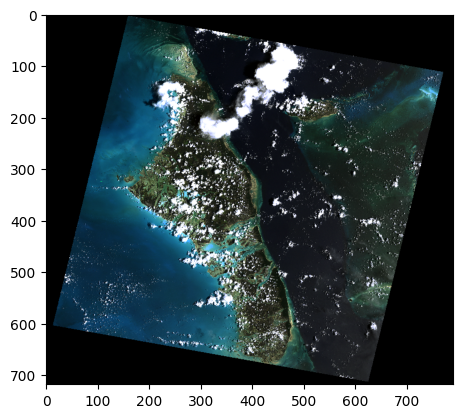

<Axes: >

In [19]:
print(f"1D-array shape is {arr.shape}")

full_arr = src.read()

print(f"3D-array shape is {full_arr.shape}")
rasterio.plot.show(full_arr)

Subsetting and modification can be done very easily

In [21]:
full_arr[:, 500, 500] #read all bands at position 500, 500

full_arr[:, 500, 500] = 255 #set all bands at position 500, 500 to 255

full_arr[:, 500, 500] #check that it worked


array([255, 255, 255], dtype=uint8)

### Raster statistics

Somethign we often want to do is to find raster statistics. This is because rasters often explain continuous or categorical data representing an area, in f.ex land cover or temperature/elevation. Finding the average elevation for an area or how much of different types of land cover inside an area is two very important applications!

(array([906525., 350713., 165954.,  95593.,  58405.,  30984.,  18771.,
          9204.,   6610.,  61055.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

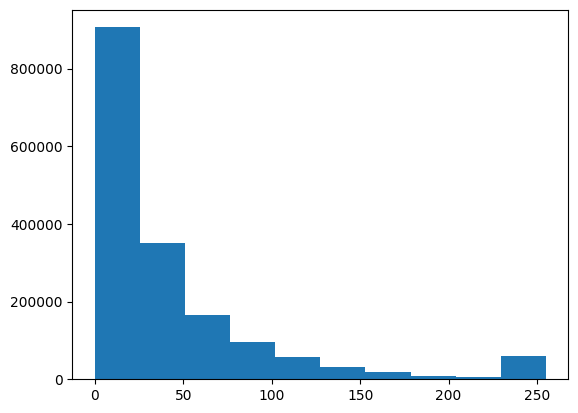

In [27]:
np.mean(full_arr)

plt.hist(full_arr.flatten())

## Georeferencing

Georeferencing is the process of assigning real-world geographic coordinates to each pixel of a raster map. 

The goal of georeferencing is to use control points to correctly find the metadata of the raster. We already have the width and the height, and let's say we also know the CRS of the image. What we then want to find is to calculate the affine transformation (translation, rotation and scaling)

In [31]:
src.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 0.0,
 'width': 791,
 'height': 718,
 'count': 3,
 'crs': CRS.from_epsg(32618),
 'transform': Affine(300.0379266750948, 0.0, 101985.0,
        0.0, -300.041782729805, 2826915.0)}

In [30]:
src.meta["transform"]

Affine(300.0379266750948, 0.0, 101985.0,
       0.0, -300.041782729805, 2826915.0)

The transform is maybe the most important part of a raster image. It explains how each pixel maps to the real-world. Rasterio.transform is the library where we work with calculating the transform. The methods xy() and rowcol() are responsible for converting between (row, col) -> (x, y) and (x, y) -> (row, col), respectively.

A small example is below here where we use the GroundControlPoints to map row and col in a rasterio image to x and y in the real world, and calculate a transform from that.

Read more on transforms here: https://rasterio.readthedocs.io/en/latest/topics/transforms.html

In [38]:
from rasterio.transform import GroundControlPoint, GCPTransformer

gcps = [GroundControlPoint(row=11521.5, col=0.5, x=-123.6185142817931, y=48.99561141948625, z=89.13533782958984, id='217', info=''),
            GroundControlPoint(row=11521.5, col=7448.5, x=-122.8802747777599, y=48.91210259315549, z=89.13533782958984, id='234', info=''),
            GroundControlPoint(row=0.5, col=0.5, x=-123.4809665720148, y=49.52809729106944, z=89.13533782958984, id='1', info=''),
            GroundControlPoint(row=0.5, col=7448.5, x=-122.7345733674704, y=49.44455878004666, z=89.13533782958984, id='18', info='')]
transformer = GCPTransformer(gcps)
transformer.xy(100,100)

(-123.47019076651907, 49.522346702615465)